In [1]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"


In [2]:
from modules.uploadData import *
from modules.getData import *

# zip_data("gd_dataset")
# get_data_from_github("gd_dataset")

In [3]:
NUM_EPOCHS = 20
BATCH_SIZE = 64
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

In [21]:
import torchvision.transforms as transforms

train_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

In [22]:
from modules.data_setup import create_dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir = "data/gd_dataset/test",
    test_dir = "data/gd_dataset/train",
    batch_size=32,
    train_transform=train_transform,
    test_transform=test_transform
)

In [6]:
from modules.model_builder_CNN2 import SimpleCNN
torch.manual_seed(42)
model_2 = SimpleCNN(input_shape=3, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)

model_2

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)

In [7]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                                 lr=LEARNING_RATE,
                                 weight_decay=1e-4)

In [52]:
from modules import engine
model_2_results = engine.train(
        model=model_2, 
        train_dataloader=train_dataloader, 
        test_dataloader=test_dataloader, 
        optimizer=optimizer,
        loss_fn=loss_fn, 
        epochs=6,
        device=device
    )

c:\Users\gabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
 17%|█▋        | 1/6 [00:09<00:47,  9.47s/it]

Epoch: 1  | Train Loss: 0.5970  | Train Accuracy: 0.8147  | Test Loss: 0.6729  | Test Accuracy: 0.5750


 33%|███▎      | 2/6 [00:18<00:37,  9.40s/it]

Epoch: 2  | Train Loss: 0.6028  | Train Accuracy: 0.7143  | Test Loss: 0.6754  | Test Accuracy: 0.5896


 50%|█████     | 3/6 [00:28<00:28,  9.38s/it]

Epoch: 3  | Train Loss: 0.6215  | Train Accuracy: 0.6473  | Test Loss: 0.6774  | Test Accuracy: 0.5833


 67%|██████▋   | 4/6 [00:37<00:18,  9.39s/it]

Epoch: 4  | Train Loss: 0.6197  | Train Accuracy: 0.6540  | Test Loss: 0.6752  | Test Accuracy: 0.5896


 83%|████████▎ | 5/6 [00:46<00:09,  9.36s/it]

Epoch: 5  | Train Loss: 0.5978  | Train Accuracy: 0.8170  | Test Loss: 0.6707  | Test Accuracy: 0.5875


100%|██████████| 6/6 [00:56<00:00,  9.39s/it]

Epoch: 6  | Train Loss: 0.5998  | Train Accuracy: 0.7277  | Test Loss: 0.6693  | Test Accuracy: 0.5750


In [9]:
# from modules.utils import save_model

# save_model(
#     model=model_2, 
#     target_directory="models", 
#     model_name="model_2_SimpleCNN.pth",
#     )

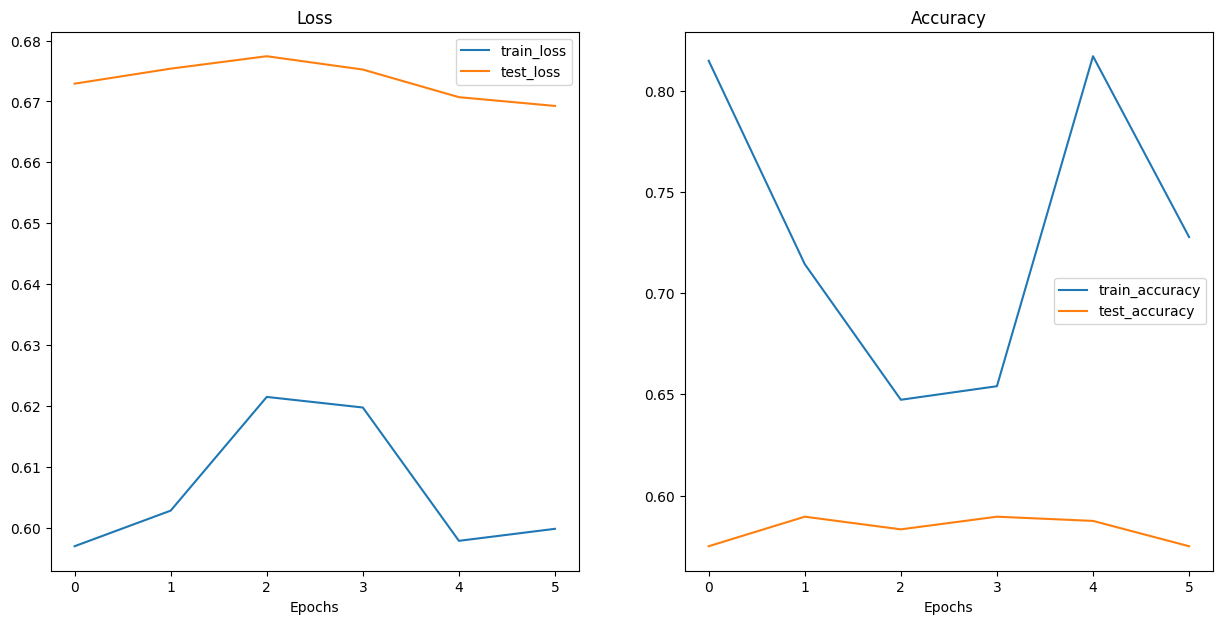

In [53]:
from modules.plots import plot_loss_curves


plot_loss_curves(model_2_results)

In [12]:
def get_random_photo(directory):
    """Returns a random .jpg file path from the given directory."""
    jpg_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg')]
    
    if not jpg_files:
        return None  # No .jpg files found
    
    return os.path.join(directory, random.choice(jpg_files))


In [63]:
from modules.plots import pred_and_plot_image
import torch

custom_image_path1 = "data/duckling.jpg"
custom_image_path2 = "data/my_goose2.jpg"

import os
import random


In [14]:

custom_image_transform = transforms.Compose([
    transforms.Resize((32, 32)),
])


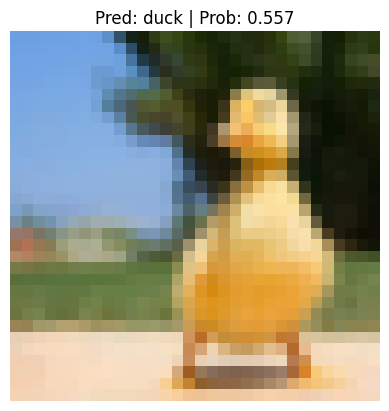

In [64]:

pred_and_plot_image(model=model_2,
                    image_path=custom_image_path1,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

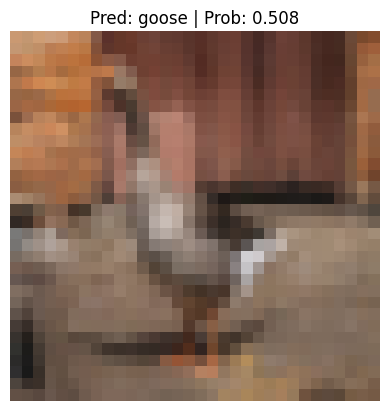

In [39]:

pred_and_plot_image(model=model_2,
                    image_path=custom_image_path2,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

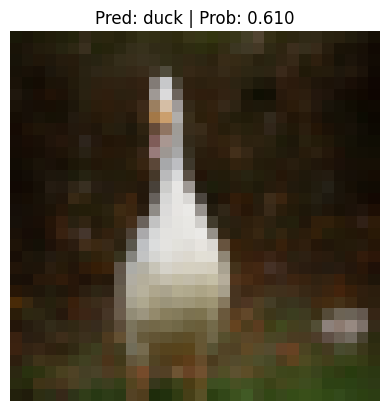

In [62]:
custom_image_path = get_random_photo("data/gd_dataset/train/duck/")  

pred_and_plot_image(model=model_2,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

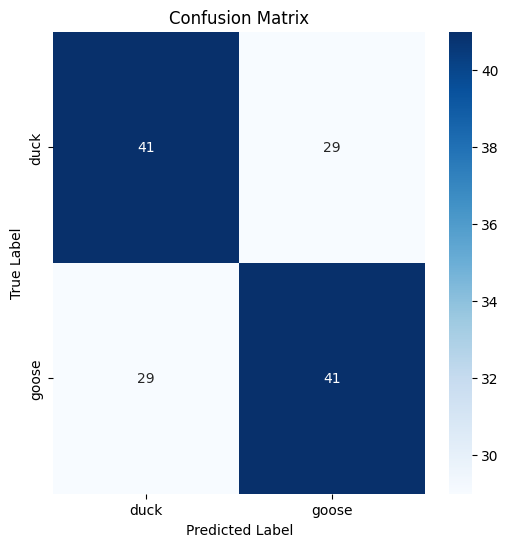

In [54]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def evaluate_model(model, dataloader, class_names, device):
    y_true = []
    y_pred = []

    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            preds = torch.argmax(outputs, dim=1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Wywołaj funkcję
evaluate_model(model_2, test_dataloader, class_names, device)
